# Data Cleaning 

### Nothing is perfect in this world...  
Let's try to see the data and see if there everything looks right.  
First thing is of course the imports...

In [78]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from seinfeld_laugh_corpus import corpus
from utils import load_corpus

Load the data

In [79]:
df = load_corpus()

Let's see it, or at least the first 100 rows:

In [80]:
df.head(100)

,character,txt,num_words,avg_word_length,start,end,length,is_funny,laugh_time,episode_num,line_num,episode_name,season,total_lines,global_episode_num
0,JERRY,"Here's what happened last week, incase you mi...",9.0,4.500000,1.106,3.050,1.944,True,3.6,6,0,The Watch,4,486,1
1,JERRY,"George and I went up to NBC, and we told them...",16.0,3.235294,3.074,6.371,3.297,False,NaN,6,1,The Watch,4,486,1
2,JERRY,We're waiting to sign the contract.,6.0,5.000000,6.444,7.822,1.378,False,NaN,6,2,The Watch,4,486,1
3,JERRY,"Jerry, I want you to sign that contract.",8.0,4.125000,7.846,9.364,1.518,False,NaN,6,3,The Watch,4,486,1
4,JERRY,We're gonna sign it.,4.0,4.250000,9.364,10.881,1.517,False,NaN,6,4,The Watch,4,486,1
5,JERRY,"In fact, George is out with the woman from NB...",12.0,3.538462,10.949,13.189,2.240,True,11.8,6,5,The Watch,4,486,1
6,JERRY,I'm afraid we're gonna have to pass.,7.0,3.750000,13.218,15.149,1.931,False,NaN,6,6,The Watch,4,486,1
7,JERRY,You're passing?,2.0,7.000000,15.220,16.800,1.580,False,NaN,6,7,The Watch,4,486,1
8,JERRY,"Well, it's much too low.",5.0,4.000000,16.800,18.380,1.580,False,NaN,6,8,The Watch,4,486,1
9,JERRY,That's it for this piece of junk. I've had it.,10.0,3.363636,18.456,20.421,1.965,False,NaN,6,9,The Watch,4,486,1


By looking at the first sentences in the data, and knowing the Seinfeld show (of course), we guess that it's Jerry in his starting stand-up scene.  
Afterwards, Morty (father of George Costanza) talks.  
##### But wait, something smells funny here...  
Is it possible that Morty talks for 14 sentences in a row? :o  
Let's take a closer look at the sentences Morty says (allegedly):  

In [81]:
df.iloc[15:29][['character', 'txt', 'start', 'end']]

,character,txt,start,end
15,MORTY,What's the matter with this Davola guy?,26.798,28.593
16,MORTY,He's after Jerry now.,28.666,30.063
17,MORTY,I never had a back problem until that night I...,30.135,33.762
18,MORTY,Cuban cigars. It's a present from my father.,35.406,38.270
19,MORTY,Here you go.,38.343,38.990
20,MORTY,"What, cigars?",38.990,39.637
21,MORTY,"Yeah, Cubans.",39.711,40.800
22,MORTY,What's wrong?,44.149,44.813
23,MORTY,The Velcro.,44.813,45.477
24,MORTY,I can't stand Velcro. That tearing sound.,45.550,48.414


It seems buggy, since the sentences looks like two people are talking to each other.  
Also, it does not seems reasonable that some character will talk for so many sentences in a row.  
We must analyze this issue and check if we have a problem in our dataset!
  
By watching this specific episode we see that this it indeed a mistake in the dataset.  
Actually, the openning sentences (alegedly by Jerry) are also a mistake, and this is actually with Jerry with his parents talking to each other.  
  
By taking a closer look at the dataset we see that most of the times the character speaking is correct.  


Let's take a look at more sentences, and see if we can see a pettern...

In [82]:
pd.set_option('max_rows', 100)
df.iloc[:100][['character', 'txt', 'start', 'end']]

,character,txt,start,end
0,JERRY,"Here's what happened last week, incase you mi...",1.106,3.050
1,JERRY,"George and I went up to NBC, and we told them...",3.074,6.371
2,JERRY,We're waiting to sign the contract.,6.444,7.822
3,JERRY,"Jerry, I want you to sign that contract.",7.846,9.364
4,JERRY,We're gonna sign it.,9.364,10.881
5,JERRY,"In fact, George is out with the woman from NB...",10.949,13.189
6,JERRY,I'm afraid we're gonna have to pass.,13.218,15.149
7,JERRY,You're passing?,15.220,16.800
8,JERRY,"Well, it's much too low.",16.800,18.380
9,JERRY,That's it for this piece of junk. I've had it.,18.456,20.421


We can see that there are Jerry, Morty & Helen talking in a row, and by watching the episode we see it's actually a mistake in the talking character.  
Afterwards, the characters are starting to switch often and are labeled correctly.  
  
To conclude, we found an attribute that might be the cause for mistakes in the talking character labels - one character speaking a lot of sentences in a row.  
By watching few (or many) episodes where this scenario happens, we see that there are cases where there is a character talking in the phone, and therefore he has many sentences in a row and it's not a labeling mistake.  
For example, in the next episode (season 4 episode 7) we have Kramer saying 10 sentences in a row, which also seems like a lot:

In [83]:
df.iloc[728:743][['character', 'txt', 'start', 'end']]     # Kramer on the phone, saying 10 sentences in a row.

,character,txt,start,end
728,JERRY,"Leave a message, I'll call you back. Thanks.",656.365,659.025
729,NAOMI,"Hi, Jerry. It's Naomi.",659.101,661.635
730,NAOMI,"Listen, if it's not too late, I changed my mind.",661.704,664.932
731,NAOMI,I'd like to go to the cabin.,665.007,666.587
732,KRAMER,Wait. Wait.,666.587,668.167
733,KRAMER,"Yeah, hello. Hi.",668.243,670.743
734,KRAMER,This is Kramer.,670.946,672.673
735,KRAMER,Yeah. I'm the next-door neighbor.,672.848,675.348
736,KRAMER,"You know, Jerry's left, but listen, you see, ...",675.751,680.481
737,KRAMER,I'm thinking of going up myself.,680.556,682.487


Let's try to see if this issue if fixable.  
Maybe we can capture the mistakes in the talking character by the amount of sentences he is saying in a row?  
To do this, we collect all this cases - we build a new DataFrame containing the count of sentences each character is saying in a row.

In [ ]:
curr_character = df['character'][0]   # The current character speaking.
curr_count = 0                        # The count for the current character speaking.
character_count = list()              # Will containg the rows we will collect...
first_row = df.iloc[0]
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    if curr_character != row['character']:
        start_time = first_row['start']
        if start_time > row['start']:
            start_time = 0
        if row['episode_num'] == first_row['episode_num']:
            character_count.append({'character': curr_character,
                                    'count': curr_count,
                                    'season': row['season'],
                                    'episode_num': row['episode_num'],
                                    'last_index': i-1,
                                    'start': row['start'],
                                    'end': row['end'],
                                    'length': row['length']})
        curr_character = row['character']
        curr_count = 1
        first_row = row
    else:
        curr_count += 1

repeating_characters = pd.DataFrame(character_count)

 28%|██▊       | 13149/46497 [00:16<00:43, 767.36it/s] 

Now we have the DataFrame 'repeating_characters', which contains a new row for every time a new character start to speak, and the cmount of sentences he says:

In [85]:
repeating_characters.head(10)

,character,count,end,episode_num,last_index,length,season,start
0,JERRY,15,28.593,6,14,1.795,4,26.798
1,MORTY,14,58.425,6,28,1.931,4,56.494
2,JERRY,12,92.127,6,40,2.933,4,89.194
3,HELEN,15,144.875,6,55,1.130,4,143.745
4,JERRY,1,145.812,6,56,0.863,4,144.949
5,HELEN,1,146.676,6,57,0.864,4,145.812
6,JERRY,1,147.831,6,58,1.080,4,146.751
7,HELEN,1,148.910,6,59,1.079,4,147.831
8,JERRY,1,150.084,6,60,1.097,4,148.987
9,HELEN,1,151.180,6,61,1.096,4,150.084


We can see that most of the values of the counter are 1, and most of them are between 1 and 4-5.  
There are some outliers that have bigger counter, and these are the suspects.  
Let's see the distribution of the amount of sentences a character says in a row numerically.

In [86]:
print(repeating_characters.describe()['count'])
print("\nPercentiles:")
print("99% of the data is below {}".format(repeating_characters['count'].quantile(.99)))
print("99.9% of the data is below {}".format(repeating_characters['count'].quantile(.999)))

count    27630.000000
mean         1.682809
std          1.582782
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         31.000000
Name: count, dtype: float64

Percentiles:
99% of the data is below 8.0
99.9% of the data is below 17.0


Okay, we see that the mean is around 1, and that 75% of the data is below 2 and below.  
Let's see the distributon visually as a histogram:

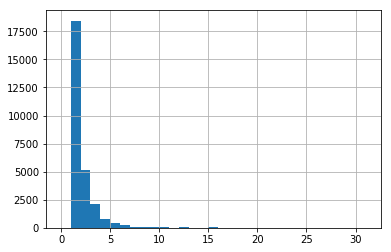

In [87]:
repeating_characters['count'].hist(bins=np.arange(0, 32))

As expected, most of the characters are speaking for 1-2 sentences, and few are "exaggerating" and talking for 5-6.  
Let's see the histogram of the tail, i.e. the amount of times a character is speaking for more than 10 sentences in a row.

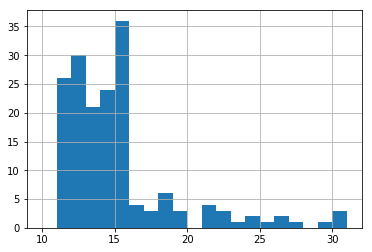

In [88]:
repeating_characters['count'][repeating_characters['count'] > 10].hist(bins=np.arange(10, 32))

By watching several episodes in these cases we see that they are indeed mistakes.  
Furthermore, the cases where the character switches frequesntly are not mistakes.  

### Final solution  
Mark these talking characters as 'UNKNOWN', but keep the other attributes (such as text, duration, funniness, etc).  
Indeed, there is no reason to remove these line from the dataset - most of it is correct, the only part that is not correct is the talking character.  
We can still use the funniness and the words in the sentence.  
In models where we take the talking character into account, we need to ignore these.  
But in other models - it's perfectly OK.  

## Futher analysis
We watched several episodes and looked at the dataset at the same time.  
  
We saw that the text is pretty accurate, subject to minor changes the man (or machine) did.  
These changes are not really an influence to our task, because most of the time they have the same meaning.  
For example, "You met her in the supermrket. How did you do that?" is shorten to "You met her in the supermrket. How?".  
For humor detection, this is not really a severe issue.  
  
The timing of the talking are also pretty accurate, and by reading the paper of Ran Yad-Shalom who created this dataset he addressed this issue specifically and payed extra attention to take several subtitles and choose the one that is best aligned with the audio.  
His job here is pretty impressive...  
  
The laughs - not perfect.  
It's mostly labeled correctly, but there are some false-positives.  
Also, the timing of the laughs are not measured perfectly.  
It's quite understandable, because in the show it's also not so obvious when the laugh start and when it ends.  
So extracting it automatically by analyzing the audio (like Ran Yad-Shalom did) seems pretty challenging.  
However, because most of the time it's actually labels correctly, we treat this as acceptable noise in our dataset and continue with our work.  